## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">ASSİGNMENT</p>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

### EXERCISE 1

In [2]:
n = 130
xbar = 98.25
sigma = 0.73

In [3]:
sem = sigma / np.sqrt(n)
sem

0.06402523540941313

In [4]:
stats.norm.interval(0.99, loc = xbar, scale = sem)

(98.08508192246582, 98.41491807753418)

### EXERCISE 2

In [5]:
n = 500
xbar = 5.4
sigma = 3.1

In [6]:
sem = sigma / np.sqrt(n)
sem

0.13863621460498696

In [7]:
stats.norm.interval(0.95, loc = xbar, scale = sem)


(5.12827801242126, 5.67172198757874)

### EXERCISE 3

In [8]:
# H0: mu = 13.20 
# H1: mu < 13.20

In [9]:
n = 40
s = 2.50
xbar = 12.20

In [10]:
t_test = (xbar - 13.20)/(s/np.sqrt(n))
t_test  #statistic

-2.5298221281347035

In [11]:
pvalue = 1 - stats.norm.cdf(-t_test)
pvalue

0.005706018193000872

In [12]:
alpha = 0.01

if  pvalue < alpha:
    print("Reject the null.")
else:
    print("Fail to reject.")

Reject the null.


### EXERCISE 4

In [13]:
df0 = pd.read_csv('soil - Sheet1.csv')
df = df0.copy()
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [14]:
df.Soil1.mean()

1.6918

In [15]:
df.Soil2.mean()

1.4171142857142855

In [16]:
stats.levene(df.dropna()["Soil1"], df["Soil2"])

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [17]:
df.Soil1.fillna(df.Soil1.mean(), inplace=True)

In [18]:
indTest = stats.ttest_ind(df.Soil1, df.Soil2, alternative="greater")
indTest

Ttest_indResult(statistic=5.58856260809653, pvalue=2.1908288831220784e-07)

In [19]:
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null.")
else:
    print("Fail to reject.")

Reject the null.


### EXERCISE 5

In [20]:
df0 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df1 = df0.copy()
df1.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [21]:
df1.Continent_Code.value_counts()


EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [23]:
a = df1.loc[(df1["Continent_Code"] == "EU") | (df1["Continent_Code"] == "AS")]

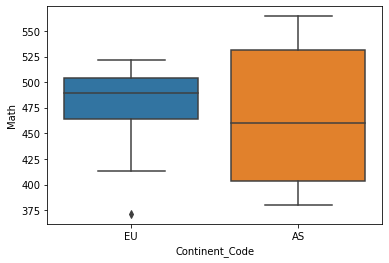

In [24]:
sns.boxplot(y = a.Math, x = a.Continent_Code);

In [25]:
indTest = stats.ttest_ind(a[a["Continent_Code"]=="EU"]["Math"], 
                a[a["Continent_Code"]=="AS"]["Math"],equal_var = True)
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [26]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null.")
else:
    print("Fail to reject.")

Fail to reject.
